# Cancer Detection Classification Predictive Modeling

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Importing Dataset 

In [2]:
#Importing "illnessstudy" dataset

df = pd.read_csv("C:\\Users\\91988\\Downloads\\illnessstudy.csv")

#Displaying first five rows of the dataset
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


<span style="color:red">Understanding the raw dataset</span>


<span style="color:blue">1. There are 31 features in the illness study dataset.</span>


<span style="color:blue">2. "diagnosis" is the dependent variable, where "M" stands for Malignant and "B" for Benign.</span>


<span style="color:blue">3. diagnosis variable is depedent on the rest 30 variables in the dataset, which are known as predictor variables.</span>

### Shape of the dataset

In [3]:
#Using pandas "shape" method to check the dimensionality of the dataset

df.shape

(569, 31)

<span style="color:blue">The given dataset has 569 rows and 31 columns.</span>

### Column Names 

In [4]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

### Checking Data Type of all columns 

In [5]:
#Using pandas "dtypes" method to check the data type of all columns in the dataset

df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

<span style="color:blue">The datatype of all independent variables is float, whereas the data type of dependent variable is object, i.e., "string or text"</span>

### Missing Values 

In [6]:
#Using pandas "isnull" method to check missing values in the dataset

df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

<span style="color:blue">From the above results, it can be seen that there are no missing values in the dataset.</span>

##  Descriptive Analysis of the dataset

In [7]:
#Using pandas "describe" function to get the statistical summary of the dataset

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<span style="color:red">Key Insights</span>


<span style="color:blue">1. Data for all indepedent variables is almost symmetrical as there is not much difference between the mean and median values</span>

<span style="color:blue">2. The standard deviation of "smoothness_mean", "compactness_mean", "concavepoints_mean", "symmetry_mean", "smoothness_worst", "compactness_worst", "concavity_worst", and "fractal_dimesion_worst" is relatively small which means that datapoints in these variables are very close to the mean. </span>

<span style="color:blue">3. The mean for "area_mean", "perimeter_mean", "area_worst", and "perimeter_worst" columns is greater than their median value, this indicates there is skewness in the data. </span>

<span style="color:blue">4. There are two unique values in the "diagnosis" column, in which "B" is the most frequent term in diagnosis column and the frequency of "B" is 357.  </span>

### Correlation 

In [8]:
#Using pandas "corr" method to check the correlation among different variables in the dataset

dfcorr = df.corr()
dfcorr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


### Correlation visualization

<AxesSubplot:>

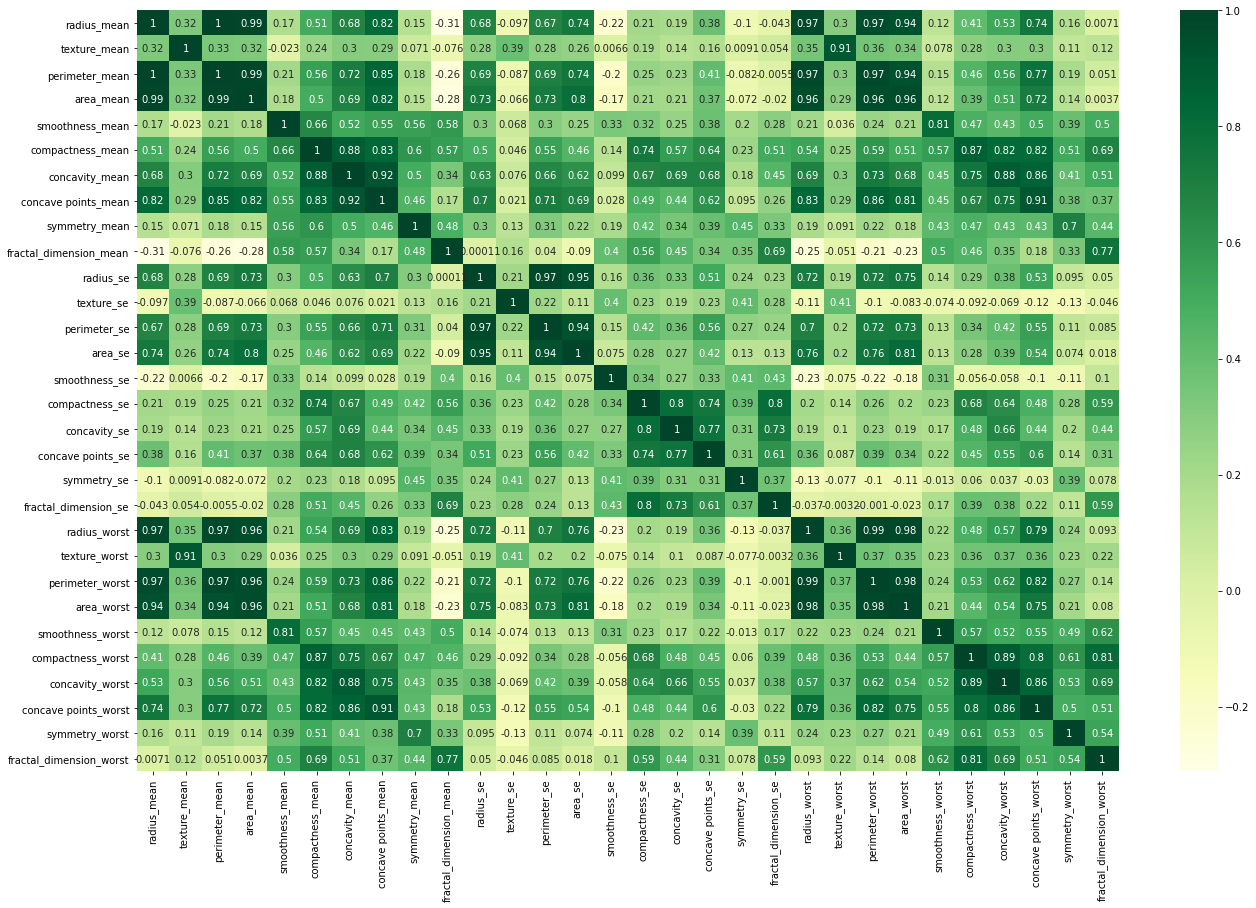

In [9]:
#Using seaborn's "heatmap" to visualize the correlation among variables 

plt.figure(figsize=(22,14))
sns.heatmap(dfcorr, annot = True, cmap = "YlGn")

<span style="color:blue">In the above chart, the darker green shade indicates the strong correlation between the variables, while the lighest shade shows the weak correlation among variables.</span>

<span style="color:blue">From the above chart, we can see that there is a strong positive correlation between "radius_mean", "perimeter_mean", "area_mean", "concave points_mean", "area_se", "radius_worst",  "perimeter_worst", "area_worst", and "concave points_worst".</span>

<span style="color:blue">Apart from this, there is also a strong correlation between "texture_mean" and "texture_worst".</span>

## Data Preprocessing 

<span style = "color:  green"> It is important to prepare data before model building. In this stage, data will be divided in train and test split and standardscaler will be so that distribution can have 0 mean and 1 standard deviation </span>

In [10]:
#Defining the variables

#defining "x" or independent variables in the dataset

x = df.drop("diagnosis", axis = 1).to_numpy()  #using pandas "drop" attribute to drop diagnosis column from x as it is a target variable 

#placing target variable "diagnosis" in y variable

y = df["diagnosis"].to_numpy() #Assigning y variable to "diagnosis" column as it is the dependent variable in the dataset

<span style="color: blue">In the above case, diagnosis is dropped from the x variable as it is the dependent variable that we want to predict, therefore variable "x" have all other 30 variables as independent variables. and diagnosis is placed in the target variable "y".</span>

In [11]:
#Randomly splitting data into training and testing data using function train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y, test_size=0.2,random_state=100)  

#the test_size parameter sets the proportion of data that is split into the testing set. 
#Thus, here 20% of data samples will be utilized for testing

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 114
number of training samples: 455


<span style="color:blue">After splitting the data into training and testing sets, we can see that 114 samples will be used for testing the data and 455 will be used for training the model.</span>

In [12]:
#Using "StandardScaler" to standardize the data

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

<span style="color: blue;"> We standardized the above data using StandardScaler function of preprocessing module of sklearn library so that it can organise the mentioned data in standard normal distribution.</span>

## Model Building 

### Support Vector Machines and Naive Bayes model 

In [13]:
#Using sklearn's svm and naive_bayes libraries to create svm and naive bayes script

for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))


Estimator: SVM
[[70  2]
 [ 3 39]]
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        72
           M       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Estimator: Naive Bayes
[[70  2]
 [ 3 39]]
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        72
           M       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Decision Tree 

In [14]:
#Using sklearn's DecisionTreeClassifier library to create decision tree script

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]:
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict)) 


Estimator: DT
[[67  5]
 [ 4 38]]
              precision    recall  f1-score   support

           B       0.94      0.93      0.94        72
           M       0.88      0.90      0.89        42

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



### Thank You 